**Iris Flower Classification using Machine Learning**

In [153]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**Reading Dataset**

In [155]:
df=pd.read_csv("/content/Iris.csv")

In [156]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [157]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [158]:
df.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [159]:
#df.head?

In [160]:
df.tail(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
135,136,7.7,3.0,6.1,2.3,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
137,138,6.4,3.1,5.5,1.8,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [162]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [163]:
df.shape

(150, 6)

In [164]:
df.size

900

In [165]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [166]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**DATA CLEANING PART**

In [167]:
df=df.drop('Id', axis = 1)

In [168]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Data Visualization**

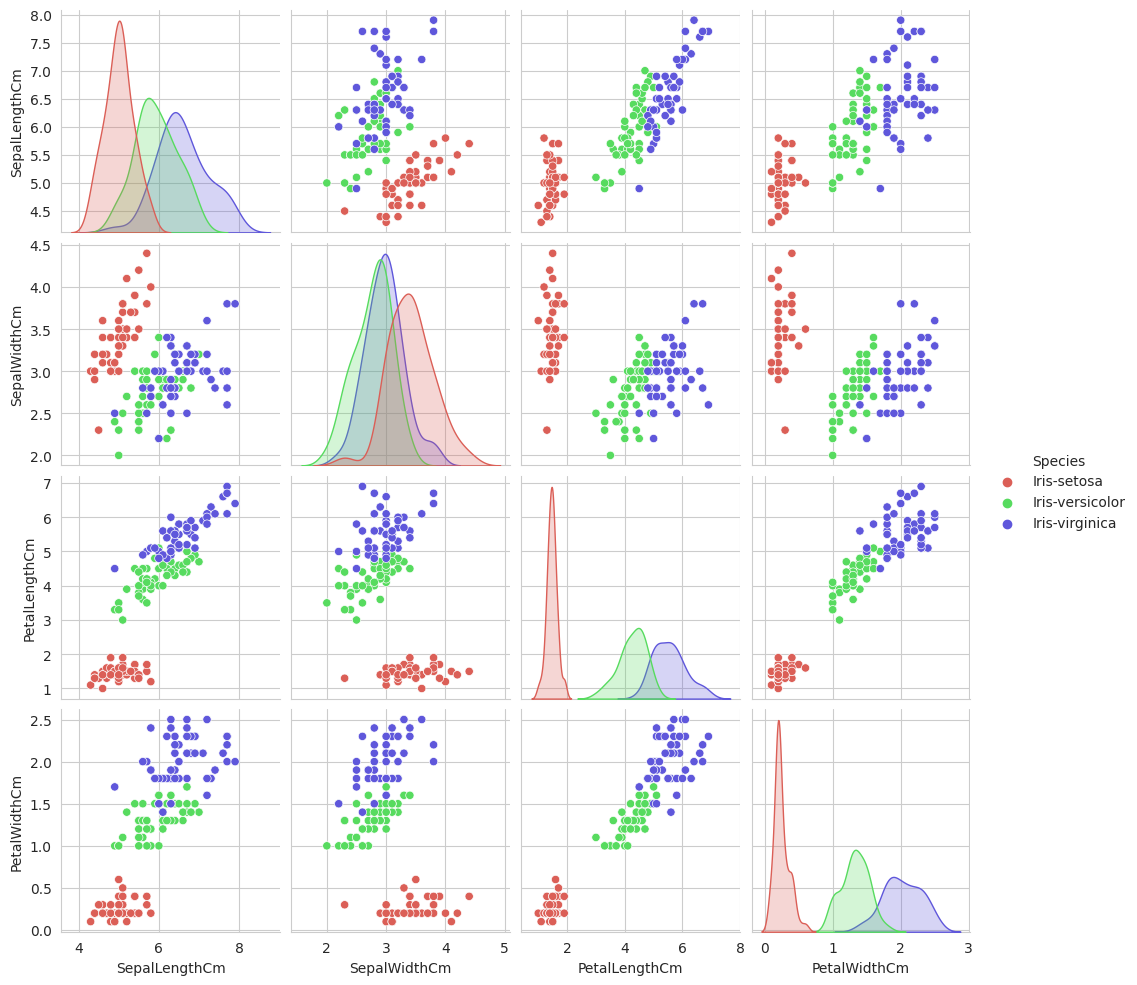

In [169]:
sns.pairplot(df, hue = 'Species', palette = 'hls')

In [170]:
df.corr()

<ipython-input-170-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


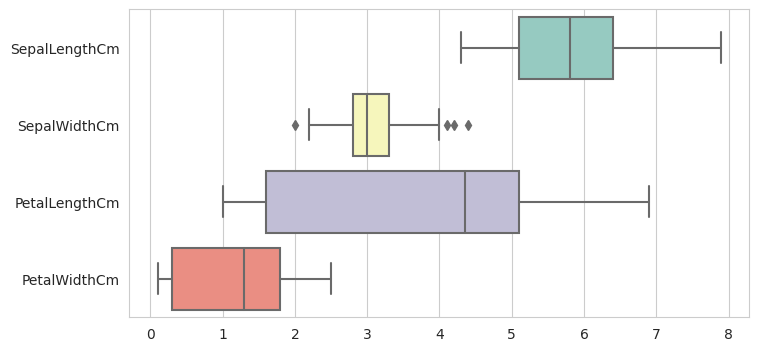

In [171]:
pt.figure(figsize=(8,4))
sns.boxplot(data=df, orient="h", palette="Set3")
pt.show()

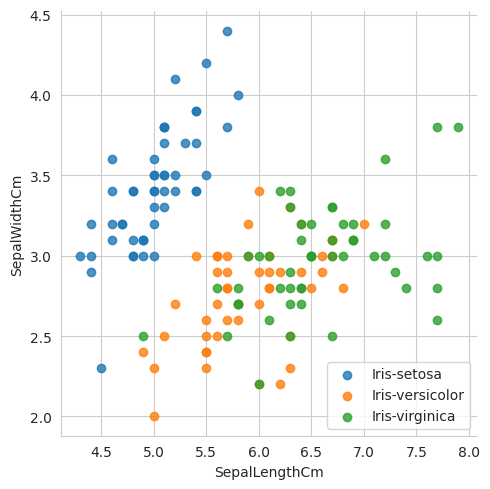

In [172]:
sns.lmplot( x="SepalLengthCm", y="SepalWidthCm", data=df, fit_reg=False, hue='Species', legend=False)
pt.legend(loc='lower right')
pt.show()

**Heatmap**

<ipython-input-173-495bb9cd6c6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


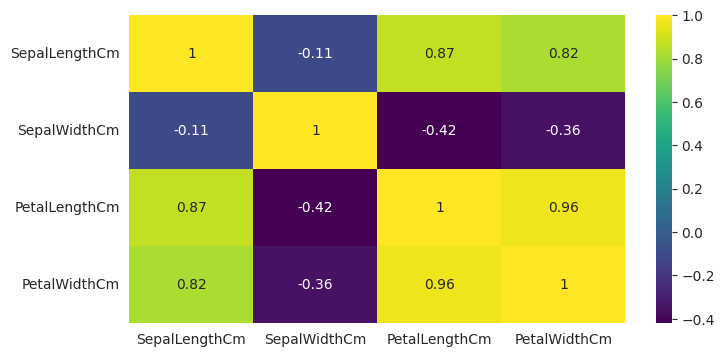

In [173]:
pt.figure(figsize=(8 ,4))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
pt.show()

**Model Training**

In [205]:
x_axis=df.drop(['Species'],1)
x_axis.head()

<ipython-input-205-18f7a5ac5754>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_axis=df.drop(['Species'],1)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [206]:
y_axis = df['Species']
y_axis.head(10)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

**Training and Testing Spilts in 60-40**

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size= 0.4)

In [208]:
#SVM
data_model=SVC()
data_model.fit(x_train,y_train)
prediction = data_model.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of SVM: %.2f%%" % (accuracy * 100.0))

#Logistic Regression
lreg_model = LogisticRegression()
lreg_model.fit(x_train, y_train)
prediction = lreg_model.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Logistic Regression: %.2f%%" % (accuracy * 100.0))

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of K-Nearest Neighbors: %.2f%%" % (accuracy * 100.0))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
prediction = dt.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Decision Tree: %.2f%%" % (accuracy * 100.0))

Accuracy of SVM: 98.33%
Accuracy of Logistic Regression: 100.00%
Accuracy of K-Nearest Neighbors: 96.67%
Accuracy of Decision Tree: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Training and Testing Spilts in 70-30**

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size= 0.3)

In [210]:
#SVM
data_model=SVC()
data_model.fit(x_train,y_train)
prediction = data_model.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of SVM: %.2f%%" % (accuracy * 100.0))

#Logistic Regression
lreg_model = LogisticRegression()
lreg_model.fit(x_train, y_train)
prediction = lreg_model.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Logistic Regression: %.2f%%" % (accuracy * 100.0))

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of K-Nearest Neighbors: %.2f%%" % (accuracy * 100.0))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
prediction = dt.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Decision Tree: %.2f%%" % (accuracy * 100.0))

Accuracy of SVM: 100.00%
Accuracy of Logistic Regression: 97.78%
Accuracy of K-Nearest Neighbors: 97.78%
Accuracy of Decision Tree: 97.78%


**Training and Testing Spilts in 80-20**

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size= 0.2)

#SVM
data_model=SVC()
data_model.fit(x_train,y_train)
prediction = data_model.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of SVM: %.2f%%" % (accuracy * 100.0))

#Logistic Regression
lreg_model = LogisticRegression()
lreg_model.fit(x_train, y_train)
prediction = lreg_model.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Logistic Regression : %.2f%%" % (accuracy * 100.0))

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of K-Nearest Neighbors : %.2f%%" % (accuracy * 100.0))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
prediction = dt.predict(x_test)
accuracy=(accuracy_score(y_test,prediction)*100)
accuracy = accuracy_score(y_test, prediction)
print("Accuracy of Decision Tree: %.2f%%" % (accuracy * 100.0))

Accuracy of SVM: 100.00%
Accuracy of Logistic Regression : 96.67%
Accuracy of K-Nearest Neighbors : 96.67%
Accuracy of Decision Tree: 90.00%
